In [5]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
data = pd.read_csv("./BLE_RSSI_dataset/iBeacon_RSSI_UnLabeled.csv")
data.head()
#drop Time Location
newdata = data.drop(columns=['location','date']);
newdata.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-80,-200,-77,-56,-81,-200,-200,-200,-200,-200,-200
1,-200,-200,-80,-200,-78,-56,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-81,-200,-74,-63,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-75,-56,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-82,-56,-200,-200,-200,-200,-200,-200,-200


In [16]:
train_data=newdata[['b3001','b3002','b3003','b3004','b3005','b3006','b3007','b3008','b3009','b3010','b3011','b3012','b3013',]]
gmmModel = GaussianMixture(n_components=5, covariance_type='diag', random_state=0)
gmmModel.fit(newdata)
labels = gmmModel.predict(newdata)
newdata['label']=labels  
print(newdata)

      b3001  b3002  b3003  b3004  b3005  b3006  b3007  b3008  b3009  b3010  \
0      -200   -200    -80   -200    -77    -56    -81   -200   -200   -200   
1      -200   -200    -80   -200    -78    -56   -200   -200   -200   -200   
2      -200   -200    -81   -200    -74    -63   -200   -200   -200   -200   
3      -200   -200   -200   -200    -75    -56   -200   -200   -200   -200   
4      -200   -200   -200   -200    -82    -56   -200   -200   -200   -200   
5      -200   -200   -200   -200    -81    -62   -200   -200   -200   -200   
6      -200   -200   -200   -200    -81    -61   -200   -200   -200   -200   
7      -200   -200   -200   -200    -81    -58   -200   -200   -200   -200   
8      -200   -200   -200   -200    -80    -58   -200   -200   -200   -200   
9      -200   -200   -200   -200    -80    -59    -76   -200   -200   -200   
10     -200   -200   -200    -78    -84    -56    -76   -200   -200   -200   
11     -200   -200   -200    -78    -80    -56    -76   -200   -

/Users/anthonymao08/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


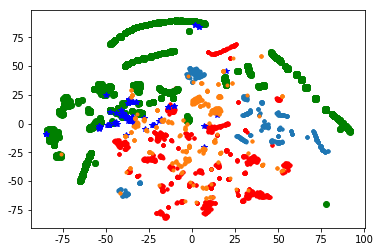

In [17]:
#用TSNE进行数据降维并展示聚类结果
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(newdata) #进行数据降维,并返回结果
tsne = pd.DataFrame(tsne.embedding_, index = newdata.index) #转换数据格式

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

#不同类别用不同颜色和样式绘图
d = tsne[newdata['label'] == 0]     #找出聚类类别为0的数据对应的降维结果
plt.plot(d[0], d[1], 'r.')
d = tsne[newdata['label'] == 1]
plt.plot(d[0], d[1], 'go')
d = tsne[newdata['label'] == 2]
plt.plot(d[0], d[1], 'b*')
d = tsne[newdata['label'] == 3]
plt.plot(d[0], d[1], '.')
d = tsne[newdata['label'] == 4]
plt.plot(d[0], d[1], '.')
#d = tsne[r[u'聚类类别'] == 5]
plt.show()